In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

from NEExT.collections import EgonetCollection
from NEExT.io import GraphIO
from NEExT.datasets import GraphDataset

%reload_ext autoreload
%autoreload 2

In [169]:
from NEExT.outliers.benchmark_utils.data_loading import load_abcdo_data, load_pygod_data
from NEExT.outliers.benchmark_utils.embed import build_features
from NEExT.outliers.benchmark_utils.embed import build_embeddings
from NEExT.outliers.benchmark_utils.supervised import supervised_eval

graph_io = GraphIO()
hide_frac = {0: 0.0, 1: 0.0}
k_hop = 1

# edges_df, mapping_df, features_df, ground_truth_df = load_pygod_data(hide_frac=hide_frac)
edges_df, mapping_df, features_df, ground_truth_df = load_abcdo_data(hide_frac=hide_frac)

graph_data = {
    "target": "is_outlier",
    "skip_features": [],
    "feature_list": [],
    # "feature_list": [i for i in features_df.columns[1:-1]],
}

In [171]:
graph_collection = graph_io.load_from_dfs(
    edges_df=edges_df,
    node_graph_df=mapping_df,
    node_features_df=features_df,
    graph_type="igraph",
    filter_largest_component=False,
)
egonet_collection = EgonetCollection(egonet_feature_target='is_outlier', skip_features=graph_data['skip_features'])
egonet_collection.compute_k_hop_egonets(graph_collection, k_hop)
structural_features, features = build_features(egonet_collection, feature_vector_length=k_hop, feature_list=graph_data["feature_list"])

In [172]:
positional_features = egonet_collection.compute_egonet_positionaL_features()
structural_features +=positional_features 

In [176]:
# structural_features.feature_columns

In [177]:
embeddings = build_embeddings(
    egonet_collection,
    structural_features,
    features,
    strategy="structural_embeddings",
    embeddings_dimension=5,
    embeddings_algorithm="approx_wasserstein",
    # approx_wasserstein, wasserstein, sinkhornvectorizer
)
dataset = GraphDataset(egonet_collection, embeddings, standardize=False)

In [178]:
model = "lgbm"
out_df, score = supervised_eval(model, ground_truth_df, dataset)
score

[I 2025-04-30 23:18:13,347] A new study created in memory with name: no-name-7bee8c3f-1965-4dc2-8f95-f6c2186691a7


[I 2025-04-30 23:18:20,458] Trial 3 finished with value: 0.5 and parameters: {'n_estimators': 51, 'min_data_in_leaf': 2, 'num_leaves': 45, 'max_depth': 1, 'class_weight': 'balanced', 'learning_rate': 0.004364403217517616, 'colsample_bytree': 0.8316011363293601}. Best is trial 3 with value: 0.5.
[I 2025-04-30 23:18:20,473] Trial 1 finished with value: 0.586875 and parameters: {'n_estimators': 13, 'min_data_in_leaf': 7, 'num_leaves': 56, 'max_depth': 65, 'class_weight': 'balanced', 'learning_rate': 1.8121294049173973, 'colsample_bytree': 0.9877711550275556}. Best is trial 1 with value: 0.586875.


[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 120, number of negative: 480
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 5[LightGBM] [Warning] Unknown parameter: class_weight

[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 120, number of negative: 480
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 5
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown p

[I 2025-04-30 23:18:20,676] Trial 2 finished with value: 0.5 and parameters: {'n_estimators': 34, 'min_data_in_leaf': 8, 'num_leaves': 78, 'max_depth': 37, 'class_weight': None, 'learning_rate': 0.00163273156163419, 'colsample_bytree': 0.5734099807982558}. Best is trial 1 with value: 0.586875.
[I 2025-04-30 23:18:20,678] Trial 0 finished with value: 0.5 and parameters: {'n_estimators': 60, 'min_data_in_leaf': 6, 'num_leaves': 48, 'max_depth': 30, 'class_weight': None, 'learning_rate': 1.5910180691526735e-05, 'colsample_bytree': 0.6704702524549087}. Best is trial 1 with value: 0.586875.
[I 2025-04-30 23:18:20,705] Trial 5 finished with value: 0.5856250000000001 and parameters: {'n_estimators': 30, 'min_data_in_leaf': 8, 'num_leaves': 33, 'max_depth': 39, 'class_weight': 'balanced', 'learning_rate': 1.3030259545519312, 'colsample_bytree': 0.6693796248041922}. Best is trial 1 with value: 0.586875.
[I 2025-04-30 23:18:20,718] Trial 4 finished with value: 0.54 and parameters: {'n_estimators

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[2]	valid_0's auc: 0.855859
[LightGBM] [Info] Number of positive: 120, number of negative: 480
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info

[I 2025-04-30 23:18:20,810] Trial 8 finished with value: 0.5 and parameters: {'n_estimators': 10, 'min_data_in_leaf': 5, 'num_leaves': 49, 'max_depth': 47, 'class_weight': 'balanced', 'learning_rate': 0.045250253501893704, 'colsample_bytree': 0.4134949130807393}. Best is trial 1 with value: 0.586875.
[I 2025-04-30 23:18:20,815] Trial 9 finished with value: 0.63125 and parameters: {'n_estimators': 49, 'min_data_in_leaf': 8, 'num_leaves': 41, 'max_depth': 24, 'class_weight': 'balanced', 'learning_rate': 3.0307533709025303, 'colsample_bytree': 0.5231644130825632}. Best is trial 9 with value: 0.63125.
[I 2025-04-30 23:18:20,935] Trial 10 finished with value: 0.5 and parameters: {'n_estimators': 26, 'min_data_in_leaf': 9, 'num_leaves': 57, 'max_depth': 58, 'class_weight': 'balanced', 'learning_rate': 0.05032621520472158, 'colsample_bytree': 0.5795933601988812}. Best is trial 9 with value: 0.63125.
[I 2025-04-30 23:18:20,974] Trial 11 finished with value: 0.5 and parameters: {'n_estimators':

[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 120, number of negative: 480
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 633
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 5
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 120, number of negative: 480
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_col_wi

[I 2025-04-30 23:18:21,088] Trial 12 finished with value: 0.775625 and parameters: {'n_estimators': 74, 'min_data_in_leaf': 1, 'num_leaves': 11, 'max_depth': 4, 'class_weight': 'balanced', 'learning_rate': 8.214148547568232, 'colsample_bytree': 0.21803552400245158}. Best is trial 12 with value: 0.775625.
[I 2025-04-30 23:18:21,093] Trial 13 finished with value: 0.759375 and parameters: {'n_estimators': 75, 'min_data_in_leaf': 4, 'num_leaves': 10, 'max_depth': 2, 'class_weight': 'balanced', 'learning_rate': 6.4325907320162665, 'colsample_bytree': 0.2409413818466779}. Best is trial 12 with value: 0.775625.
[I 2025-04-30 23:18:21,202] Trial 14 finished with value: 0.6637500000000001 and parameters: {'n_estimators': 75, 'min_data_in_leaf': 6, 'num_leaves': 21, 'max_depth': 69, 'class_weight': 'balanced', 'learning_rate': 6.471203494877303, 'colsample_bytree': 0.9932800112214573}. Best is trial 12 with value: 0.775625.
[I 2025-04-30 23:18:21,231] Trial 15 finished with value: 0.775625 and p

[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 120, number of negative: 480
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 633
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 5
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 120, number of negative: 480
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning]

[I 2025-04-30 23:18:21,489] Trial 18 finished with value: 0.51375 and parameters: {'n_estimators': 75, 'min_data_in_leaf': 1, 'num_leaves': 11, 'max_depth': 1, 'class_weight': 'balanced', 'learning_rate': 0.31006356586556827, 'colsample_bytree': 0.2292548880975653}. Best is trial 12 with value: 0.775625.
[I 2025-04-30 23:18:21,517] Trial 19 finished with value: 0.5025000000000001 and parameters: {'n_estimators': 63, 'min_data_in_leaf': 1, 'num_leaves': 94, 'max_depth': 78, 'class_weight': 'balanced', 'learning_rate': 0.4528517451168745, 'colsample_bytree': 0.21197596234270957}. Best is trial 12 with value: 0.775625.
[I 2025-04-30 23:18:21,633] Trial 21 finished with value: 0.5 and parameters: {'n_estimators': 63, 'min_data_in_leaf': 4, 'num_leaves': 99, 'max_depth': 79, 'class_weight': None, 'learning_rate': 8.116906170070262e-05, 'colsample_bytree': 0.32875033014941946}. Best is trial 12 with value: 0.775625.


[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 120, number of negative: 480
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 633
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 5
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

[I 2025-04-30 23:18:21,653] Trial 20 finished with value: 0.5 and parameters: {'n_estimators': 63, 'min_data_in_leaf': 4, 'num_leaves': 98, 'max_depth': 79, 'class_weight': 'balanced', 'learning_rate': 9.338675914298433e-05, 'colsample_bytree': 0.2922357556538717}. Best is trial 12 with value: 0.775625.
[I 2025-04-30 23:18:21,788] Trial 22 finished with value: 0.5 and parameters: {'n_estimators': 58, 'min_data_in_leaf': 4, 'num_leaves': 96, 'max_depth': 80, 'class_weight': None, 'learning_rate': 0.000165427844715018, 'colsample_bytree': 0.3243668460252883}. Best is trial 12 with value: 0.775625.
[I 2025-04-30 23:18:21,815] Trial 23 finished with value: 0.5 and parameters: {'n_estimators': 59, 'min_data_in_leaf': 4, 'num_leaves': 94, 'max_depth': 79, 'class_weight': None, 'learning_rate': 6.394588852450992e-05, 'colsample_bytree': 0.3037369170384633}. Best is trial 12 with value: 0.775625.
[I 2025-04-30 23:18:21,888] Trial 24 finished with value: 0.775625 and parameters: {'n_estimators'

[LightGBM] [Info] Number of positive: 120, number of negative: 480
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 633
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 120, number of negative: 480
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0

[I 2025-04-30 23:18:22,100] Trial 26 finished with value: 0.76125 and parameters: {'n_estimators': 68, 'min_data_in_leaf': 2, 'num_leaves': 27, 'max_depth': 13, 'class_weight': 'balanced', 'learning_rate': 5.486412342162397, 'colsample_bytree': 0.28490422600204707}. Best is trial 12 with value: 0.775625.
[I 2025-04-30 23:18:22,160] Trial 27 finished with value: 0.59875 and parameters: {'n_estimators': 69, 'min_data_in_leaf': 2, 'num_leaves': 30, 'max_depth': 16, 'class_weight': 'balanced', 'learning_rate': 9.599141566720842, 'colsample_bytree': 0.47199146405666026}. Best is trial 12 with value: 0.775625.
[I 2025-04-30 23:18:22,226] Trial 28 finished with value: 0.5806250000000001 and parameters: {'n_estimators': 69, 'min_data_in_leaf': 2, 'num_leaves': 71, 'max_depth': 15, 'class_weight': 'balanced', 'learning_rate': 1.3415961785125983, 'colsample_bytree': 0.2624179030464146}. Best is trial 12 with value: 0.775625.
[I 2025-04-30 23:18:22,244] Trial 29 finished with value: 0.540625 and 

[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 120, number of negative: 480
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 633
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 5
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-04-30 23:18:22,425] Trial 30 finished with value: 0.584375 and parameters: {'n_estimators': 2, 'min_data_in_leaf': 2, 'num_leaves': 70, 'max_depth': 13, 'class_weight': 'balanced', 'learning_rate': 1.2851828178800326, 'colsample_bytree': 0.5007476638980548}. Best is trial 12 with value: 0.775625.
[I 2025-04-30 23:18:22,524] Trial 31 finished with value: 0.55625 and parameters: {'n_estimators': 54, 'min_data_in_leaf': 5, 'num_leaves': 71, 'max_depth': 9, 'class_weight': 'balanced', 'learning_rate': 0.9786373232980912, 'colsample_bytree': 0.3704334911724031}. Best is trial 12 with value: 0.775625.
[I 2025-04-30 23:18:22,580] Trial 32 finished with value: 0.51125 and parameters: {'n_estimators': 55, 'min_data_in_leaf': 6, 'num_leaves': 81, 'max_depth': 58, 'class_weight': 'balanced', 'learning_rate': 0.08749515322156184, 'colsample_bytree': 0.37718636490382784}. Best is trial 12 with value: 0.775625.


[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 120, number of negative: 480
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 633
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 5
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[2]	valid_0's auc: 0.811953
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warn

[I 2025-04-30 23:18:22,612] Trial 33 finished with value: 0.5 and parameters: {'n_estimators': 55, 'min_data_in_leaf': 6, 'num_leaves': 87, 'max_depth': 57, 'class_weight': 'balanced', 'learning_rate': 0.0779684138985983, 'colsample_bytree': 0.3889868342702948}. Best is trial 12 with value: 0.775625.
[I 2025-04-30 23:18:22,747] Trial 34 finished with value: 0.586875 and parameters: {'n_estimators': 53, 'min_data_in_leaf': 6, 'num_leaves': 16, 'max_depth': 8, 'class_weight': 'balanced', 'learning_rate': 3.0188394392348674, 'colsample_bytree': 0.3645147916434384}. Best is trial 12 with value: 0.775625.
[I 2025-04-30 23:18:22,860] Trial 35 finished with value: 0.6725000000000001 and parameters: {'n_estimators': 42, 'min_data_in_leaf': 3, 'num_leaves': 20, 'max_depth': 24, 'class_weight': 'balanced', 'learning_rate': 2.8452847809349824, 'colsample_bytree': 0.2005973243143499}. Best is trial 12 with value: 0.775625.


[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 120, number of negative: 480
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 633
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 5
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-04-30 23:18:22,927] Trial 36 finished with value: 0.6775 and parameters: {'n_estimators': 43, 'min_data_in_leaf': 7, 'num_leaves': 20, 'max_depth': 25, 'class_weight': 'balanced', 'learning_rate': 3.059246005616001, 'colsample_bytree': 0.20723139845871702}. Best is trial 12 with value: 0.775625.
[I 2025-04-30 23:18:22,949] Trial 37 finished with value: 0.6775 and parameters: {'n_estimators': 43, 'min_data_in_leaf': 7, 'num_leaves': 18, 'max_depth': 24, 'class_weight': 'balanced', 'learning_rate': 3.3871286892633017, 'colsample_bytree': 0.2037065768077473}. Best is trial 12 with value: 0.775625.
[I 2025-04-30 23:18:23,040] Trial 38 finished with value: 0.6775 and parameters: {'n_estimators': 42, 'min_data_in_leaf': 3, 'num_leaves': 21, 'max_depth': 36, 'class_weight': 'balanced', 'learning_rate': 3.016965942566034, 'colsample_bytree': 0.2524784451602915}. Best is trial 12 with value: 0.775625.


[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 120, number of negative: 480
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 633
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 5
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

[I 2025-04-30 23:18:23,190] Trial 39 finished with value: 0.6287499999999999 and parameters: {'n_estimators': 64, 'min_data_in_leaf': 1, 'num_leaves': 37, 'max_depth': 37, 'class_weight': 'balanced', 'learning_rate': 3.4881743620959758, 'colsample_bytree': 0.8265942284645991}. Best is trial 12 with value: 0.775625.
[I 2025-04-30 23:18:23,290] Trial 41 finished with value: 0.5 and parameters: {'n_estimators': 65, 'min_data_in_leaf': 1, 'num_leaves': 39, 'max_depth': 41, 'class_weight': None, 'learning_rate': 0.014478929343211024, 'colsample_bytree': 0.6752378587078915}. Best is trial 12 with value: 0.775625.
[I 2025-04-30 23:18:23,318] Trial 40 finished with value: 0.5 and parameters: {'n_estimators': 64, 'min_data_in_leaf': 1, 'num_leaves': 36, 'max_depth': 36, 'class_weight': None, 'learning_rate': 1.1904893011713315e-05, 'colsample_bytree': 0.7985798994431508}. Best is trial 12 with value: 0.775625.


[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 120, number of negative: 480
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 633
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 5
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 120, number of negative: 480
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You

[I 2025-04-30 23:18:23,359] Trial 42 finished with value: 0.5 and parameters: {'n_estimators': 65, 'min_data_in_leaf': 1, 'num_leaves': 40, 'max_depth': 95, 'class_weight': None, 'learning_rate': 0.026983071565171206, 'colsample_bytree': 0.6832513430031866}. Best is trial 12 with value: 0.775625.
[I 2025-04-30 23:18:23,510] Trial 43 finished with value: 0.5 and parameters: {'n_estimators': 20, 'min_data_in_leaf': 1, 'num_leaves': 26, 'max_depth': 92, 'class_weight': None, 'learning_rate': 0.022284276551309726, 'colsample_bytree': 0.7322546227639768}. Best is trial 12 with value: 0.775625.
[I 2025-04-30 23:18:23,636] Trial 44 finished with value: 0.775625 and parameters: {'n_estimators': 71, 'min_data_in_leaf': 5, 'num_leaves': 26, 'max_depth': 8, 'class_weight': 'balanced', 'learning_rate': 8.576881747965396, 'colsample_bytree': 0.27206210710129486}. Best is trial 12 with value: 0.775625.


[LightGBM] [Info] Number of positive: 120, number of negative: 480
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 633
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 5
[LightGBM] [Info] Number of positive: 120, number of negative: 480
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 747
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
Training until validation scores don't improve for 5 rounds
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Star

[I 2025-04-30 23:18:23,672] Trial 45 finished with value: 0.775625 and parameters: {'n_estimators': 72, 'min_data_in_leaf': 5, 'num_leaves': 27, 'max_depth': 19, 'class_weight': 'balanced', 'learning_rate': 9.999443245661961, 'colsample_bytree': 0.2709959013890954}. Best is trial 12 with value: 0.775625.
[I 2025-04-30 23:18:23,717] Trial 46 finished with value: 0.525625 and parameters: {'n_estimators': 72, 'min_data_in_leaf': 3, 'num_leaves': 24, 'max_depth': 8, 'class_weight': 'balanced', 'learning_rate': 0.7275698480043261, 'colsample_bytree': 0.26960990123118866}. Best is trial 12 with value: 0.775625.
[I 2025-04-30 23:18:23,831] Trial 47 finished with value: 0.62 and parameters: {'n_estimators': 71, 'min_data_in_leaf': 5, 'num_leaves': 52, 'max_depth': 6, 'class_weight': 'balanced', 'learning_rate': 9.804549098848412, 'colsample_bytree': 0.42500457626567534}. Best is trial 12 with value: 0.775625.


[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 120, number of negative: 480
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 633
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 5
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-04-30 23:18:23,876] Trial 48 finished with value: 0.53125 and parameters: {'n_estimators': 72, 'min_data_in_leaf': 5, 'num_leaves': 51, 'max_depth': 5, 'class_weight': 'balanced', 'learning_rate': 0.7027003290022649, 'colsample_bytree': 0.3397662462088757}. Best is trial 12 with value: 0.775625.
[I 2025-04-30 23:18:23,883] Trial 49 finished with value: 0.541875 and parameters: {'n_estimators': 72, 'min_data_in_leaf': 5, 'num_leaves': 50, 'max_depth': 6, 'class_weight': 'balanced', 'learning_rate': 0.6414748026291605, 'colsample_bytree': 0.43408755763921897}. Best is trial 12 with value: 0.775625.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[9]	valid_0's auc: 0.736172
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 150, number of negative: 600
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1223
[LightGBM] [Info] Number of data points in the train set: 750, number of used features: 5
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -

0.7893749999999999

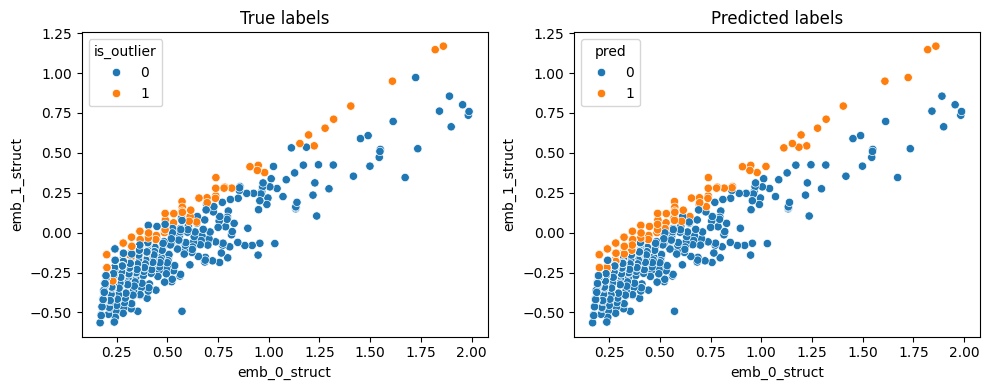

In [179]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(x=embeddings.embeddings_df.iloc[:, 1], y=embeddings.embeddings_df.iloc[:, 2], hue=ground_truth_df["is_outlier"], ax=ax[0])
ax[0].set_title("True labels")

sns.scatterplot(x=embeddings.embeddings_df.iloc[:, 1], y=embeddings.embeddings_df.iloc[:, 2], hue=out_df["pred"], ax=ax[1])
ax[1].set_title("Predicted labels")

fig.tight_layout()

/home/quak/miniconda3/envs/neext/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


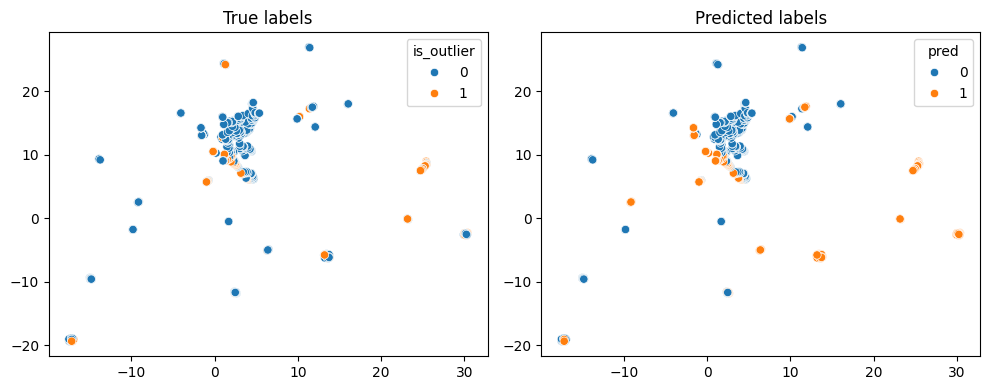

In [180]:
import umap

reduced = umap.UMAP().fit_transform(embeddings.embeddings_df.iloc[:, 1:])

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=ground_truth_df["is_outlier"], ax=ax[0])
ax[0].set_title("True labels")

sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=out_df["pred"], ax=ax[1])
ax[1].set_title("Predicted labels")

fig.tight_layout()